In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import tensorflow as tf

In [ ]:
data = tf.keras.datasets.fashion_mnist 
 
(x_train, y_train),(x_test, y_test) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullovers', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

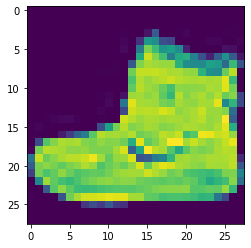

In [ ]:
plt.imshow(x_train[0]) # 0 to 225
plt.show()

In [ ]:
x_train = x_train/255.0
X_test = x_test/255.0

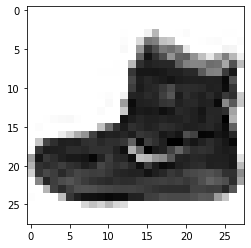

In [ ]:
plt.imshow(x_train[0], cmap = plt.cm.binary) # 0 to 225
plt.show()

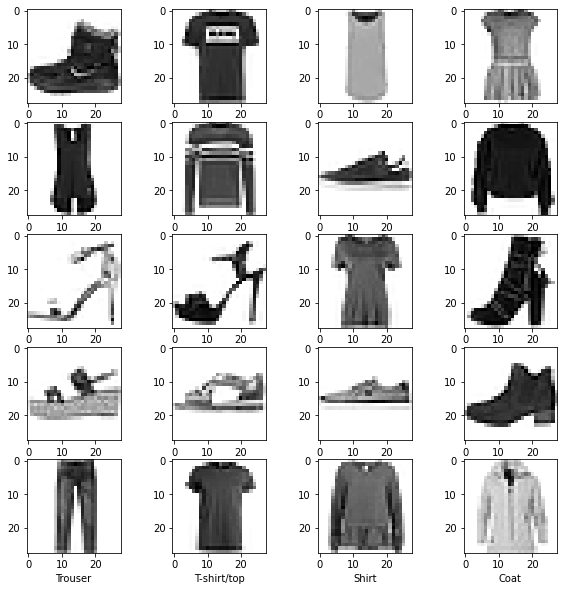

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(20):
  plt.subplot(5, 4, i+1)
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

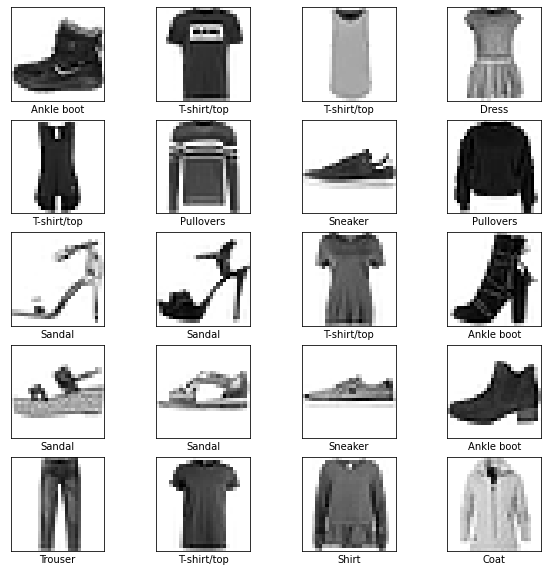

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(20):
  plt.subplot(5, 4, i+1)
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
  plt.xticks([])
  plt.yticks([])

In [ ]:
# input layer ----> 28*28 => 784

In [ ]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Flatten(input_shape = (28, 28)),
                        tf.keras.layers.Dense(128, activation = 'relu'),
                        tf.keras.layers.Dense(10)])
 
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6258 - accuracy: 0.7835
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3821 - accuracy: 0.8616
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8765
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3083 - accuracy: 0.8857
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2956 - accuracy: 0.8917
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2767 - accuracy: 0.8980
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2635 - accuracy: 0.9036
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9054
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2412 - accuracy: 0.9116
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [ ]:
train_loss, train_acc = model.evaluate(x_train,y_train)
 
print("Training accuracy is () with Training Loss ()".format(train_acc, train_loss))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1410 - accuracy: 0.9481
Training accuracy is () with Training Loss ()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
 
print("Testing accuracy is () with Testing Loss ()".format(test_acc, test_loss))

313/313 [==============================] - 1s 2ms/step - loss: 85.5481 - accuracy: 0.8681
Testing accuracy is () with Testing Loss ()


In [ ]:
# added 1 layer to convert logits or score of each neuron to probability
 
probability_model = tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [ ]:
pred = probability_model.predict(x_test)

In [ ]:
pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
np.argmax(pred[0]), class_names[np.argmax(pred[0])]

(9, 'Ankle boot')

In [ ]:
y_test[0], class_names[y_test[0]]

(9, 'Ankle boot')

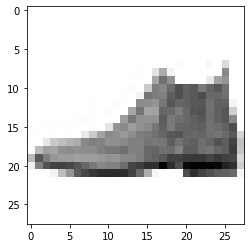

In [ ]:
plt.imshow(x_test[0], cmap = plt.cm.binary)

In [ ]:
# plot image with its label
 
def plot_image(i, pred, x_test,y_test):
  img = x_test[i]
  actual = y_test[i]
  predicted = np.argmax(pred[i])
  plt.imshow(img, cmap = plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  if actual == predicted:
    color = 'g'
  else:
    color = 'r'
  plt.xlabel("{} with prob {}".format(class_names[predicted], 100*np.max(pred[i])), color = color)

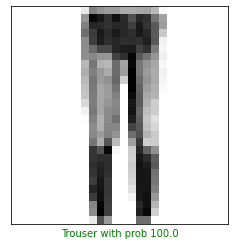

In [ ]:
plot_image(3, pred, x_test, y_test)

In [ ]:
def plot_prob(i, pred, y_test):
  predicted = np.argmax(pred[i])
  actual = y_test[i]
  bplot = plt.bar(range(10), pred[i], color = 'y')
  plt.xticks(range(10))
  plt.yticks([])
  bplot[predicted].set_color('r')
  bplot[actual].set_color('g')

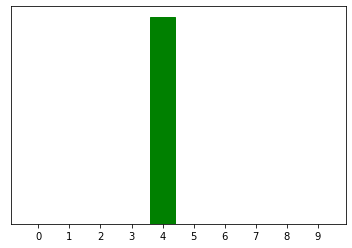

In [ ]:
plot_prob(10, pred, y_test)

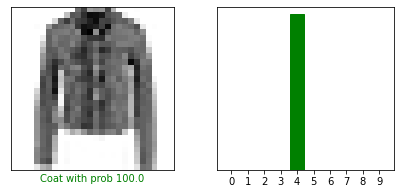

In [ ]:
plt.figure(figsize = (7, 3))
plt.subplot(1, 2, 1)
plot_image(10, pred, x_test, y_test)
plt.subplot(1, 2, 2)
plot_prob(10, pred, y_test)

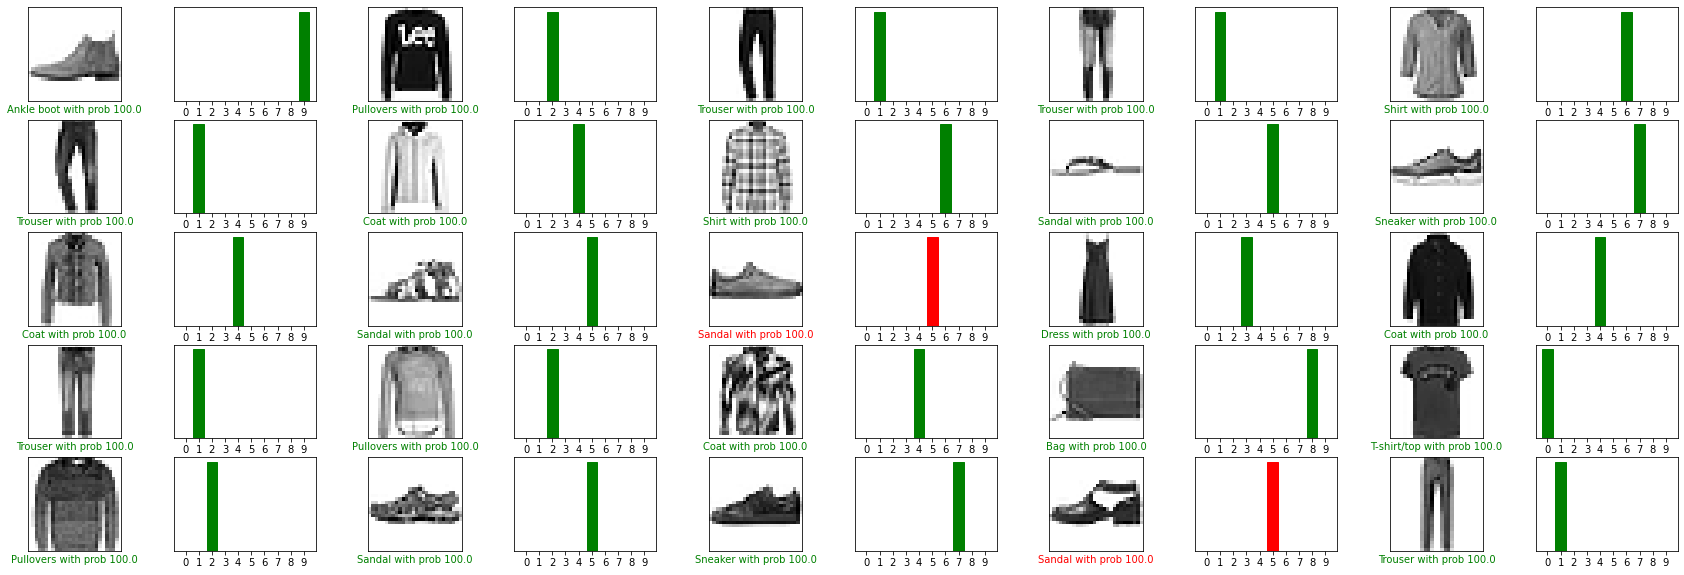

In [ ]:
r = 5
c = 5
n = r*c
plt.figure(figsize = (3*2*c, 2*r))
for i in range(n):
  plt.subplot(r, 2*c, 2*i+1)
  plot_image(i, pred, x_test, y_test)
  plt.subplot(r, 2*c, 2*i+2)
  plot_prob(i, pred, y_test)